In [1]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from json import load

In [5]:
with open("covid-19-projections/population.json", "rb") as f:
    compartments = load(f)

with open("covid-19-projections/params.json", "rb") as f:
    params = load(f)

In [21]:
y0 = [
  compartments["susceptible"],
  compartments["exposed"],
  compartments["presymptomatic"],        
  compartments["symptomatic_infected"],  
  compartments["asymptomatic_infected"],
  compartments["quarantined"],          
  compartments["isolated"],            
  compartments["recovered"],           
  compartments["death"],               
]
N = sum(y0)

t = np.linspace(0, 1600, 160)

In [22]:
def nabi_kumar_erturk(y, t, N, p):
    S, E1, E2, I, A, Q, L, R, D = y
    def mk_lambda(beta, compt):
        coefficient = beta * (1 - p["m"]*p["ζ"])
        ratio = compt/N
        return coefficient * ratio
    lambdaE2 = mk_lambda(p["βE₂"], E2)
    lambdaA = mk_lambda(p["βA"], A)
    lambdaI = mk_lambda(p["βI"], I)
    lambdaQ = mk_lambda(p["βQ"], Q)
    lambdaL = mk_lambda(p["βL"], L)


    return [
     -(lambdaE2 + lambdaA + lambdaI + lambdaQ + lambdaL) * S,
     (lambdaE2 + lambdaA + lambdaI + lambdaQ + lambdaL)*S - p["κ₁"]*E1,
     p["κ₁"]*E1 - (p["κ₂"] + p["q"])*E2,
     p["ρ"]*p["κ₂"]*E2 - (p["τI"] + p["γI"] + p["δI"])*I,
     (1 - p["ρ"])*p["κ₂"]*E2 - (p["τA"] + p["γA"])*A,
     p["q"]*E2 - (p["γQ"] + p["δQ"])*Q,
     p["τI"]*I + p["τA"]*A - (p["δL"] + p["γL"])*L,
     p["γI"]*I + p["γA"]*A + p["γQ"]*Q + p["γL"]*L,
     p["δI"]*I + p["δL"]*L + p["δQ"]*Q
    ]

In [23]:
ret = odeint(nabi_kumar_erturk, y0, t, args=(N, params))
S, E1, E2, I, A, Q, L, R, D = ret.T

In [24]:
%matplotlib inline

/tmp/ipykernel_275802/3530428917.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


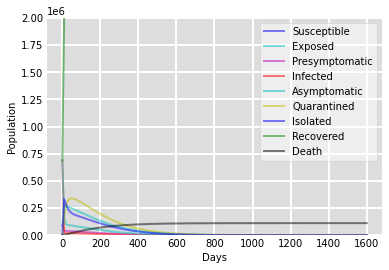

In [33]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

# DC add
# ax.set_yscale('log')


ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E1, 'c', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, E2, 'm', alpha=0.5, lw=2, label='Presymptomatic')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, A, 'c', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, Q, 'y', alpha=0.5, lw=2, label='Quarantined')
ax.plot(t, L, 'b', alpha=0.5, lw=2, label='Isolated')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, D, 'k', alpha=0.5, lw=2, label='Death')

ax.set_xlabel('Days')
ax.set_ylabel('Population')
ax.set_ylim(0, 200000000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()